In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import matplotlib.colors as mcol
import astropy.units as u
import scipy.stats as sts
from misc import * 

plt.style.use('./presentation.mplstyle')

In [5]:
sources = pd.read_csv('saga_dwarfs.csv')
print(sources.shape)

smorph = pd.read_csv('saga_morph.csv')
print(smorph.shape)

(8036, 10)
(6211, 78)


In [ ]:
rd2deg = (180*3600)/np.pi

Mr_sol = 4.65
rho = [1.077,0.246]
gamma = [-0.606,1.098]

print(np.log10(rd2deg))
def reff(mag,sfb): return np.sqrt(np.power(10,0.4*(sfb-mag))/(2*np.pi))
def sfb(mag,reff): return mag + 2.5*np.log10(2*np.pi*reff**2)
def abs_mag(M,col,g=gamma): return 2.5*(g[1]*col+g[0]-M) + Mr_sol
def Re(M,p=rho): return p[0] + p[1]*M   #returns log(reff/pc)
def app_mag(M,col,D): return abs_mag(M,col) + 5*(D+5) #needs D/Mpc

def mst_phot(sfb,col): return 1.968503937*(1.297*col +1.165 +np.log10(np.pi*rd2deg*rd2deg)-0.4*sfb)

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.27)

bands = {'g':[mcm.Blues,'tab:blue'],'r':[mcm.Greens,'tab:green'],'i':[mcm.Oranges,'tab:orange'],'z':[mcm.Reds,'tab:red']}


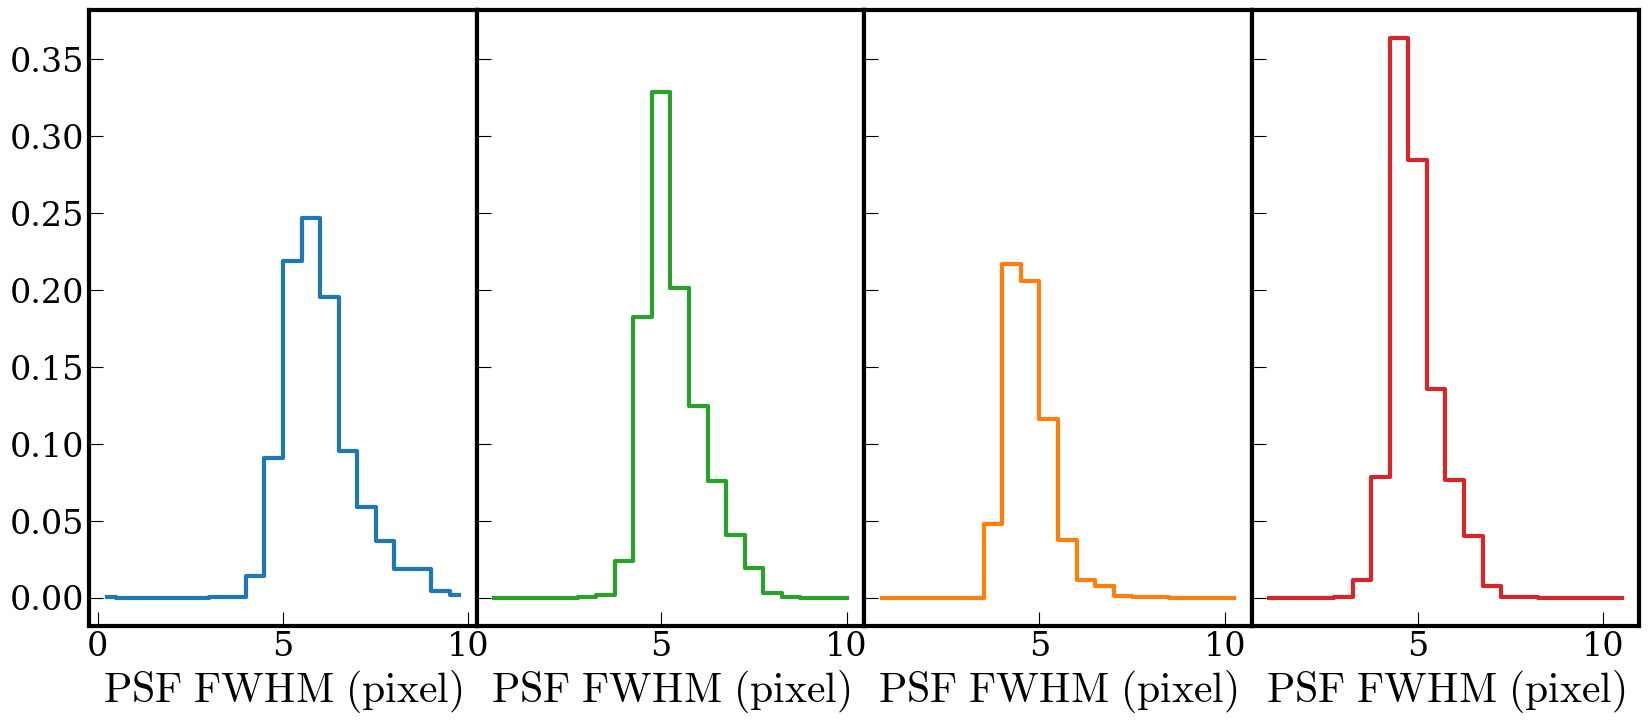

In [5]:
fig,ax=plt.subplots(1,4,figsize=(20,8),sharey='row',sharex='col')

psf_bins = np.linspace(0,10,21)

for i,k in enumerate(channels):

    bin_sat, bin_edg = np.histogram(sources['psfsize_'+k]/0.262,bins=psf_bins)
    bin_edg+=0.5*(bin_edg[1]-bin_edg[0])
    ax[i].step(bin_edg[:-1],bin_sat/len(sources['ind']),c=bands[k][1],lw=3,where='mid')

    #ax[i].text(1.25,3,r'${\it '+k+'}$',fontsize=44)
    ax[i].set_xlabel(r'$PSF\ FWHM\ (pixel)$',fontsize=30)
#ax[1,0].set_ylabel( r'$CCF$',fontsize=40)
        
plt.subplots_adjust(wspace=0.0,hspace=0.0)
plt.savefig('PSFdistributions.pdf',bbox_inches='tight')


/Users/joyb/dwarf_morphology/misc.py:84: UserWarning: The following kwargs were not used by contour: 'lw'
  CS = ax[0].contour(H,lw=6,extent = XYext,origin='lower',colors='black')


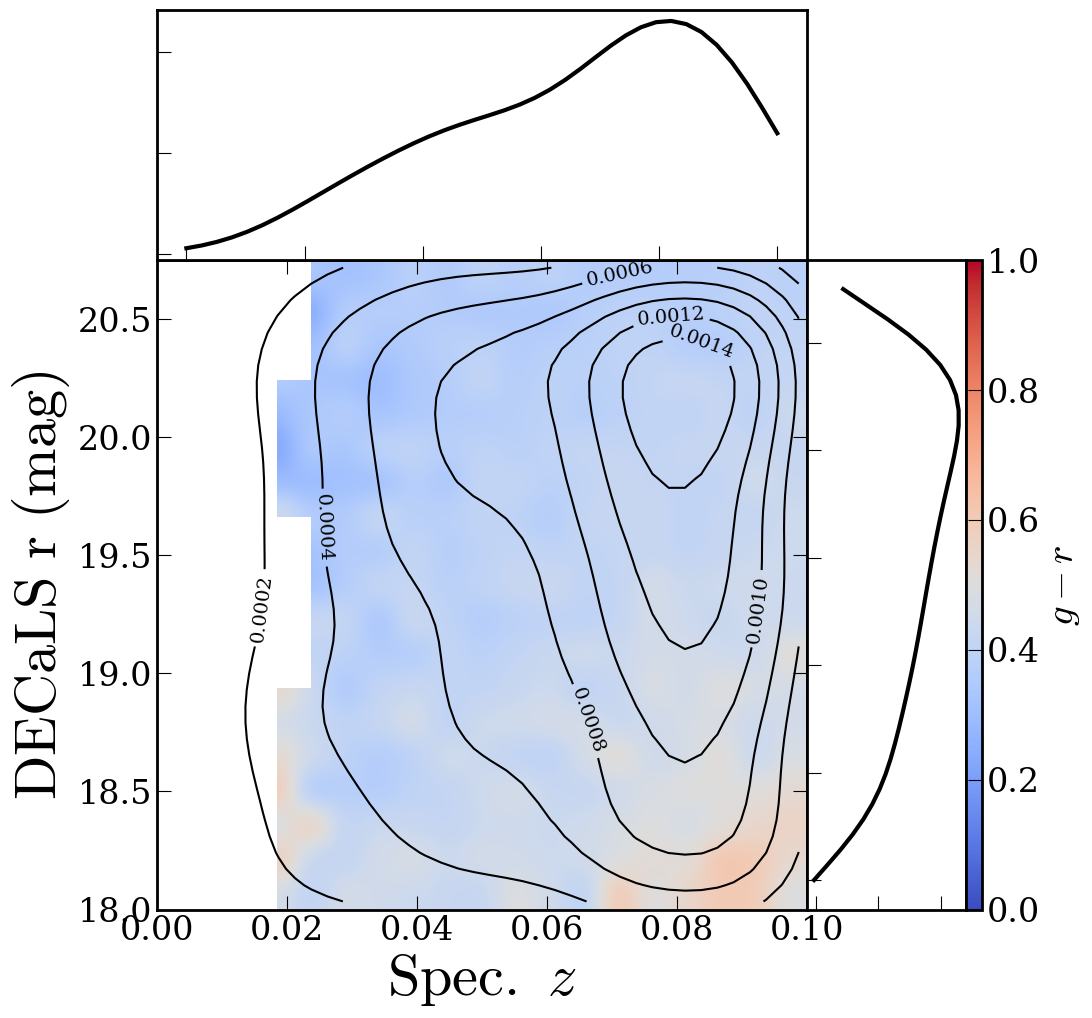

In [8]:
Xlabel,Ylabel=r'${\rm Spec.}\ {\it z}$',r'$DECaLS\ r\ (mag)$'
XYext = [0,0.1,18,20.75]

fig = hist_2d_marg_axes(Xlabel,Ylabel,XYext)

#cmap_hists(fig,sources['zspec'],sources['rmag'],0,XYext,Xlabel,Ylabel,CMAP=mcm.coolwarm,Z=sources['g-r'],Zext=[0,1],Zlabel=r'${\it g-r}$')


g_r = sources['g-r'].iloc[smorph['ind1']]
zspec = sources['zspec'].iloc[smorph['ind1']]
rmag = sources['rmag'].iloc[smorph['ind1']]

cmap_hists(fig,zspec,rmag,1,XYext,Xlabel,Ylabel,CMAP=mcm.coolwarm,Z=g_r,Zext=[0,1],Zlabel=r'${\it g-r}$')

plt.savefig('SAGAbg_selection1.pdf',bbox_inches='tight')

14467


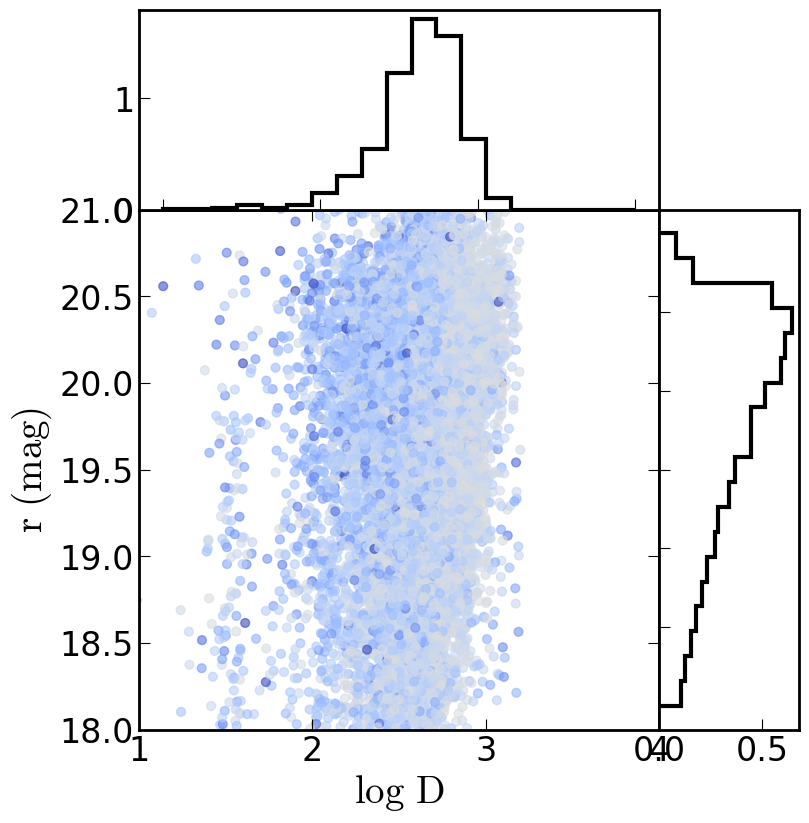

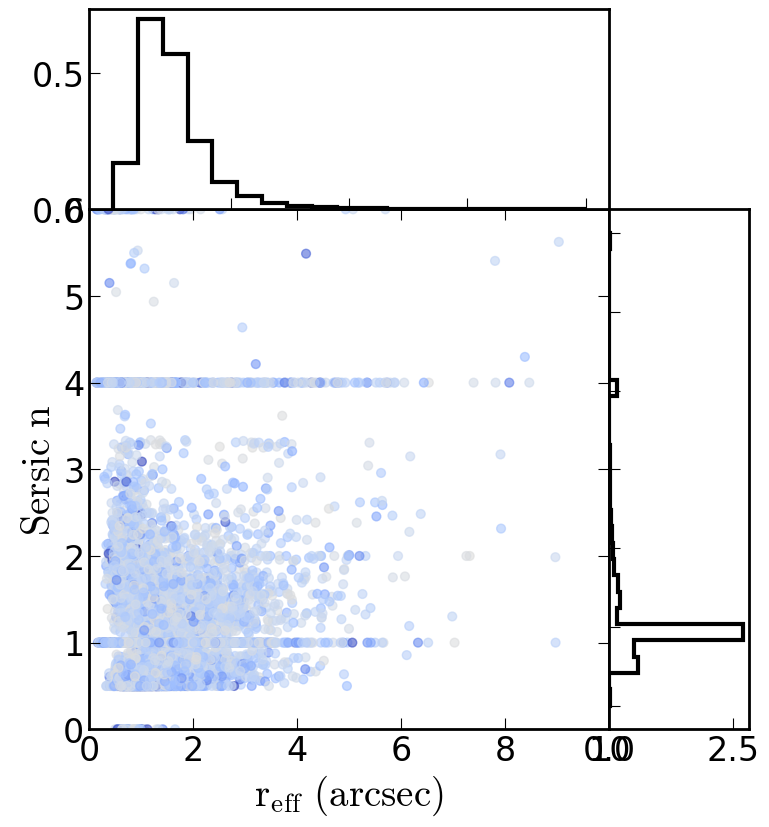

In [18]:
#avail = np.where((zspec>0)&(zspec<0.1)&(rmag<21)&(g_r<0.5))[0]
avail = np.where((g_r<0.5)&(rmag>18)&(dst<3.2))[0]
print(len(avail))

scatter_hists(dst[avail],rmag[avail],Xbins=np.linspace(1,4,20),Ybins=np.linspace(18,21,20),Xlabel=r'$log\ D$',Ylabel=r'$r\ (mag)$',Z=g_r[avail],Zbins=[0,1])

scatter_hists(reffr[avail],sersic[avail],Xbins=np.linspace(0,10,20),Ybins=np.linspace(0,6,30),Xlabel=r'$r_{\rm eff}\ (arcsec)$',Ylabel='$Sersic\ n$',Z=g_r[avail],Zbins=[0,1])


In [19]:
import csv

ra = np.genfromtxt('saga-dr3-tableC2.txt',usecols=3)
dec = np.genfromtxt('saga-dr3-tableC2.txt',usecols=4)
 
# opening the csv file in 'w+' mode
file = open('saga_dwarfs.csv', 'w+', newline ='')
 
# writing the data into the file
with file:    
    write = csv.writer(file)
    write.writerow(["RA","DEC"])
    write.writerows([[ra[j],dec[j]] for j in avail])

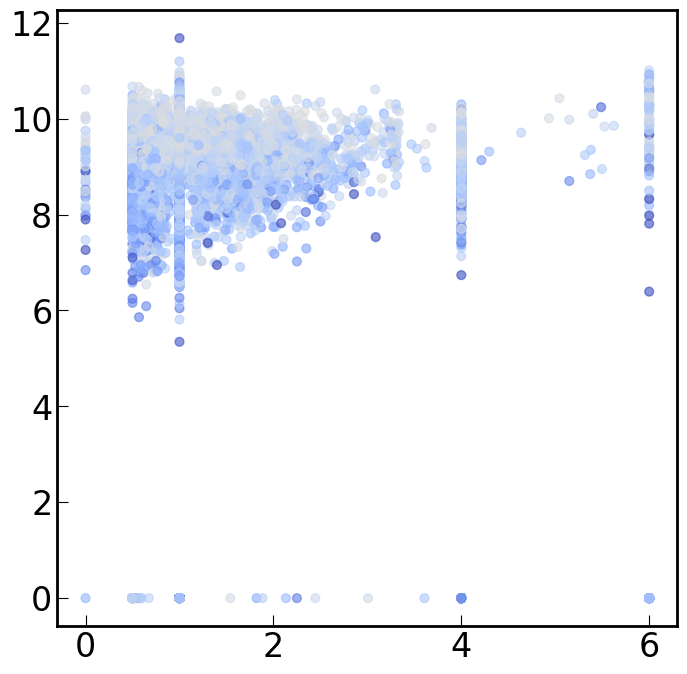

In [14]:
fig,ax=plt.subplots(figsize=(8,8))

ax.scatter(sersic[avail],mst[avail],alpha=0.6,s=40,c=g_r[avail],cmap=mcm.coolwarm,vmin=0,vmax=1)


In [11]:
def linear(X,A): return A[0]+A[1]*X

-0.20689573982506992 0.4062006362420963


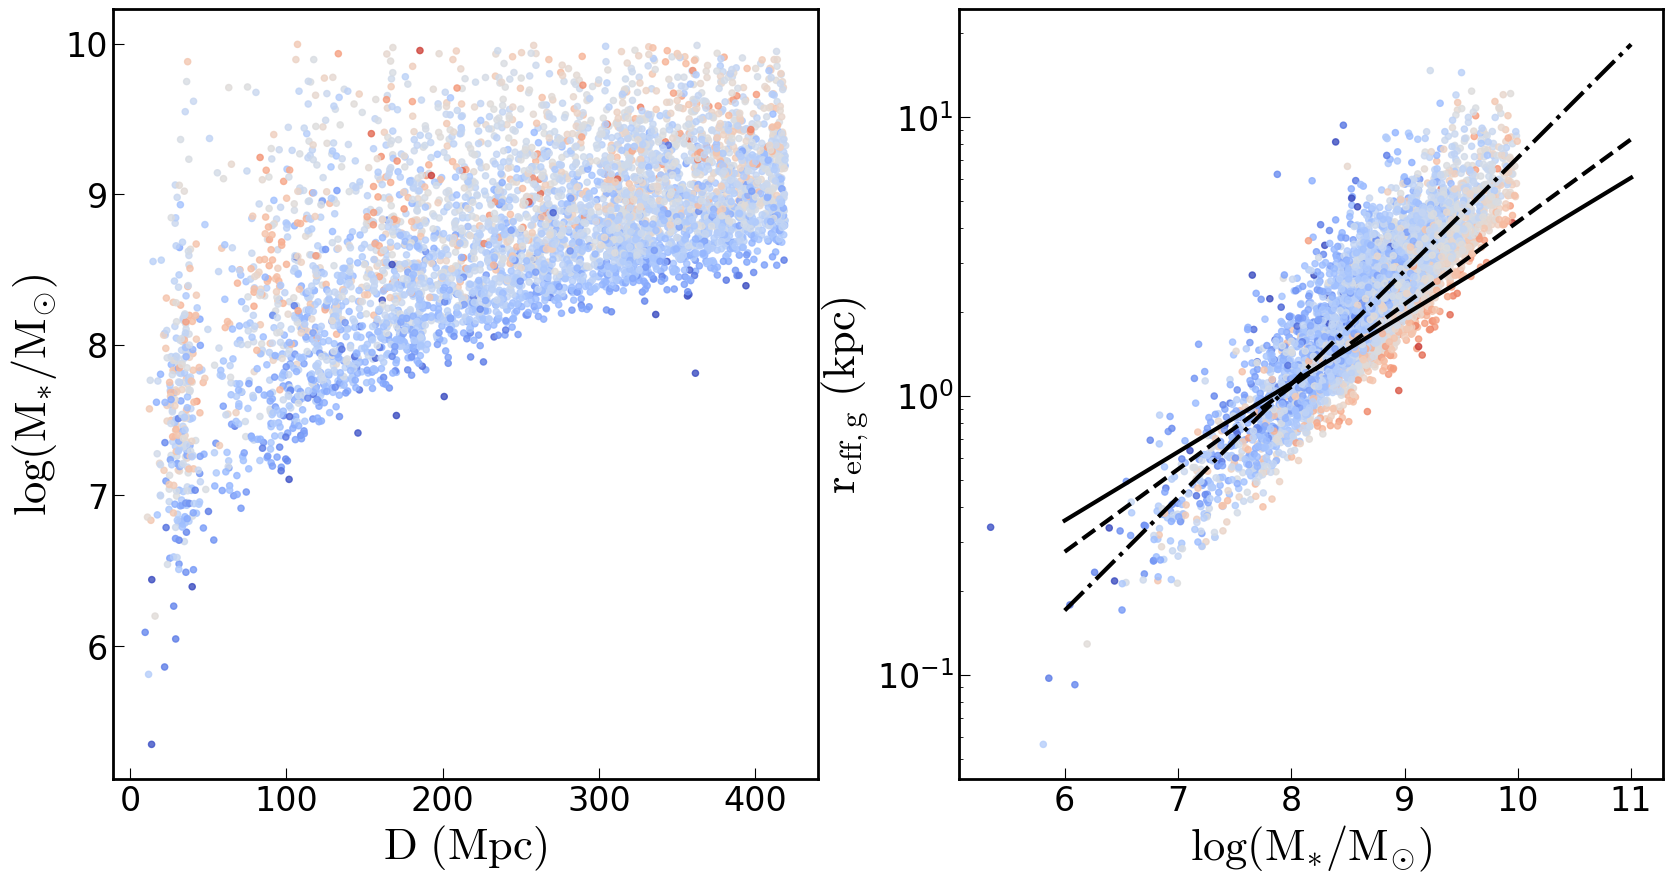

In [36]:
fig,ax=plt.subplots(1,2,figsize=(20,10))

mst_arr = np.linspace(6,11,11)
rph = 1e3*(reffr[avail]*zdist[avail].value)/rd2deg

ax[0].scatter(zdist[avail],mst[avail],alpha=0.8,s=20,c=g_r[avail],cmap=mcm.coolwarm,vmin=0,vmax=1)
ax[1].scatter(mst[avail],rph,alpha=0.8,s=20,c=g_r[avail],cmap=mcm.coolwarm,vmin=0,vmax=1)
        
res = sts.linregress(mst[avail],np.log10(rph))
p0 = [res.intercept,res.slope]
print(p0[0]+3,p0[1])

ax[1].plot(mst_arr,np.power(10,linear(mst_arr,p0)),color='black',ls='-.',lw=3)
ax[1].plot(mst_arr,np.power(10,Re(mst_arr)-3),color='black',lw=3)
ax[1].plot(mst_arr,np.power(10,Re(mst_arr,[0.665,0.296])-3),color='black',lw=3,ls='--')
#ax[1].plot(mst_arr,np.power(10,danieli_Re(mst_arr)),color='black',lw=3,ls='-.')

ax[1].set_yscale('log')
#lsbg_prop[:,1] = np.power(10,elves_Re(lsbg_solve[:,0])-3)

ax[0].set_xlabel(r'$D\ (Mpc)$',fontsize=32)
ax[0].set_ylabel(r'$log(M_{\ast}/M_{\odot})$',fontsize=32)

ax[1].set_xlabel(r'$log(M_{\ast}/M_{\odot})$',fontsize=32)
ax[1].set_ylabel(r'$r_{\rm eff,g}\ (kpc)$',fontsize=32)

plt.savefig('SAGAmass_distance.pdf',bbox_inches='tight')



In [8]:
print(np.log10(rd2deg)+0.655-6)

-0.030574866823540603


[8.06620893 2.32480246]


/var/folders/h6/wvvht_j93kdd56hj5zln7l_h0vlgf3/T/ipykernel_30622/3074085086.py:23: UserWarning: The following kwargs were not used by contour: 'lw', 'ls', 'aspect'
  ax[0].contour(np.transpose(sfb_arr[0,:,:]), levels=[rmag[lsbg_id]],lw=4,ls='--', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')
/var/folders/h6/wvvht_j93kdd56hj5zln7l_h0vlgf3/T/ipykernel_30622/3074085086.py:24: UserWarning: The following kwargs were not used by contour: 'lw', 'ls', 'aspect'
  ax[1].contour(np.transpose(sfb_arr[0,:,:]), levels=[rmag[lsbg_id]],lw=4,ls='-.', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')
/var/folders/h6/wvvht_j93kdd56hj5zln7l_h0vlgf3/T/ipykernel_30622/3074085086.py:28: UserWarning: The following kwargs were not used by contour: 'lw', 'ls', 'aspect'
  ax[0].contour(np.transpose(sfb_arr[1,:,:]), levels=[np.log10(reffr[lsbg_id])],lw=4,ls='--', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')
/var/folders/h6/wvvht_j93kdd56hj5zln7l_h0

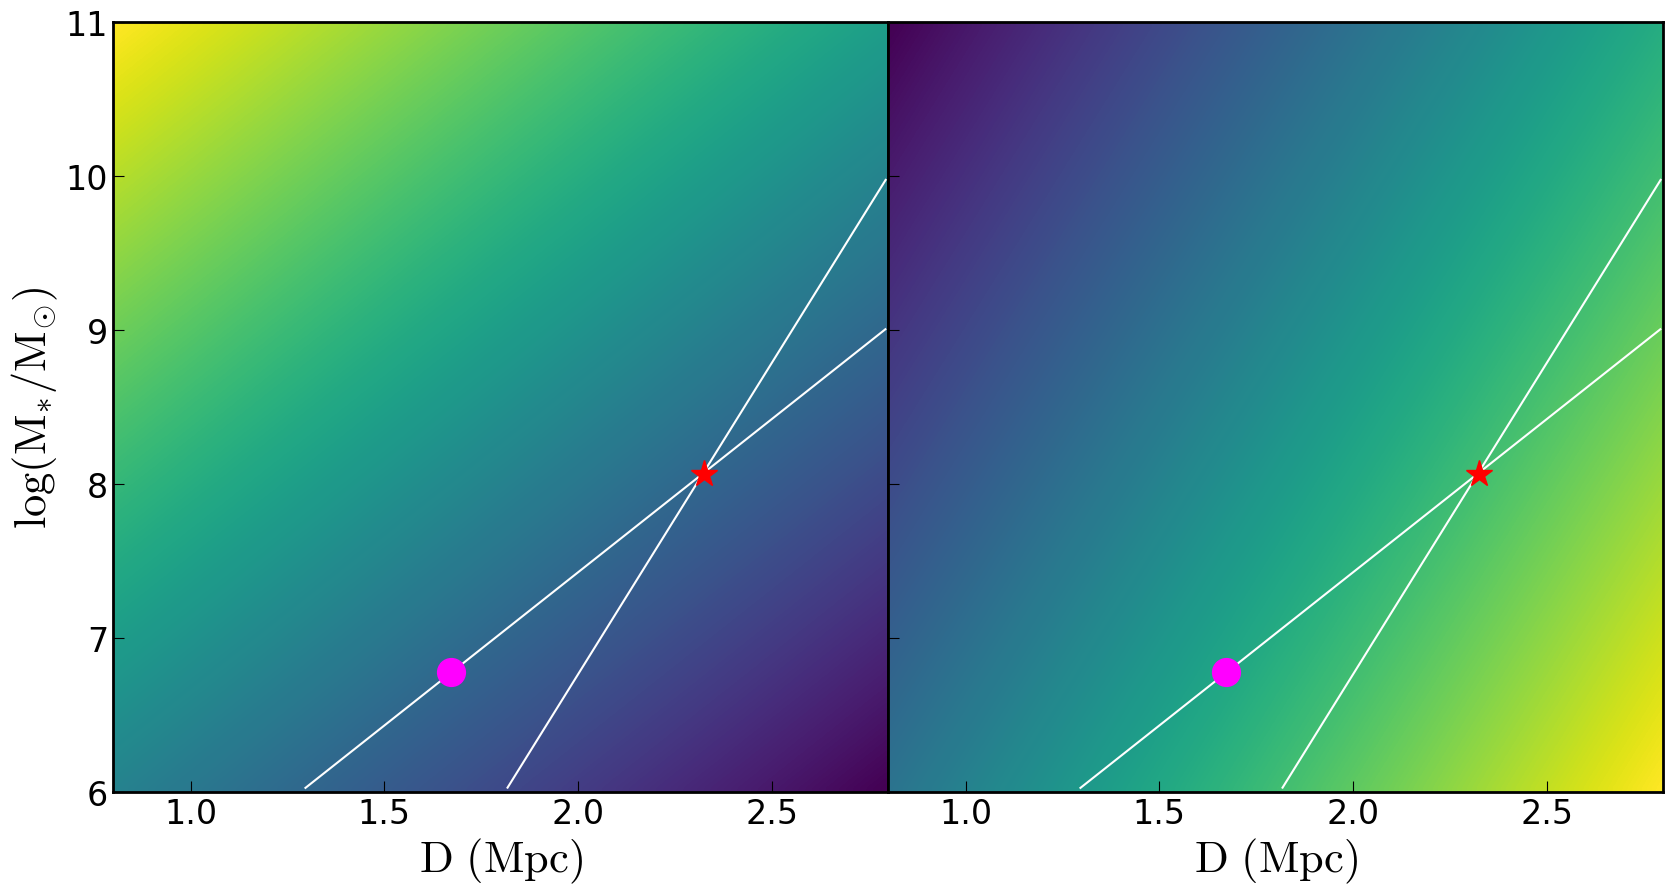

In [16]:
#def sfb_mag_degen(M,g_i,Re): return abs_mag(M,g_i) +10 + 2.5*np.log10(np.pi*rd2deg*rd2deg)+5*Re

fig,ax=plt.subplots(1,2,figsize=(20,10),sharey=True)

sfb_arr = np.zeros((2,200,100))
mst_arr = np.linspace(6,11,100)
D_arr = np.linspace(0.8,2.8,200)

lsbg_id=npr.choice(avail)

for j in range(100):
    for i in range(200):
                sfb_arr[0,i,j] = app_mag(mst_arr[j],g_r[lsbg_id],D_arr[i])

                sfb_arr[1,i,j] = np.log10(rd2deg)-D_arr[i] + Re(mst_arr[j])-6

a = np.array([[-2.5,5], [rho[1],-1]])
b = np.array([rmag[lsbg_id] - 2.5*gamma[1]*g_r[lsbg_id]-2.5*gamma[0]-Mr_sol-25, np.log10(reffr[lsbg_id])+6-np.log10(rd2deg)-rho[0]])
x = np.linalg.solve(a, b)
print(x)

im = ax[0].imshow(np.transpose(sfb_arr[0,:,:]),cmap='viridis_r',aspect='auto',extent = [0.8,2.8,6,11],origin='lower',interpolation='gaussian')
ax[0].contour(np.transpose(sfb_arr[0,:,:]), levels=[rmag[lsbg_id]],lw=4,ls='--', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')
ax[1].contour(np.transpose(sfb_arr[0,:,:]), levels=[rmag[lsbg_id]],lw=4,ls='-.', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')


im = ax[1].imshow(np.transpose(sfb_arr[1,:,:]),cmap='viridis_r',aspect='auto',extent = [0.8,2.8,6,11],origin='lower',interpolation='gaussian')
ax[0].contour(np.transpose(sfb_arr[1,:,:]), levels=[np.log10(reffr[lsbg_id])],lw=4,ls='--', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')
ax[1].contour(np.transpose(sfb_arr[1,:,:]), levels=[np.log10(reffr[lsbg_id])],lw=4,ls='-.', colors='white',aspect='auto',extent = [0.8,2.8,6,11],origin='lower')


ax[0].plot(x[1],x[0],marker='*',color='red',markersize=20)
ax[1].plot(x[1],x[0], marker='*',color='red',markersize=20)

ax[0].plot(dst[lsbg_id],mst[lsbg_id],marker='o',color='fuchsia',markersize=20)
ax[1].plot(dst[lsbg_id],mst[lsbg_id], marker='o',color='fuchsia',markersize=20)

ax[0].set_xlabel(r'$D\ (Mpc)$',fontsize=32)
ax[1].set_xlabel(r'$D\ (Mpc)$',fontsize=32)
ax[0].set_ylabel(r'$log(M_{\ast}/M_{\odot})$',fontsize=32)

plt.subplots_adjust(wspace=0.0)


In [38]:
def linear(X,A): return A[0]+A[1]*X[0]+A[2]*X[1]